## Modeling - Random Forest Regressor

The goal of this notebook is to try out the Random Forest Regressor to see if it can be a valuable predictor of taxi trip duration based on the features that we engineered.

In [1]:
import pandas as pd 
import numpy as np
from sklearn.metrics import r2_score

In [2]:
cd ..

/Users/Monika/Desktop/Machine_Learning/nyc_taxi


In [3]:
df = pd.read_csv('data/22NOVtrain.csv')

In [4]:
df_test = pd.read_csv('data/test_NOV23_final.csv')

In [59]:
print(df.shape)
print(df_test.shape)

(1087451, 33)
(625134, 21)


In [6]:
df.columns

Index(['Unnamed: 0', 'X', 'id', 'vendor_id', 'pickup_datetime',
       'dropoff_datetime', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'trip_duration', 'distance_km', 'speed_km_sec',
       'day', 'month', 'hour', 'geometry', 'pickup_date', 'pickup_hour',
       'dropoff_date', 'dropoff_hour', 'pickup_dayofmonth',
       'pickup_dateinnumbers', 'pickup_monthinnumbers', 'average_temperature',
       'precipitation', 'snowfall', 'snowdepth', 'kmeanscluster',
       'neighborhood', 'cat_day'],
      dtype='object')

In [7]:
df_test.columns

Index(['X', 'id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'day_of_month', 'month',
       'neighborhood', 'kmeanscluster', 'average_temperature', 'precipitation',
       'snowfall', 'snowdepth', 'distance_km', 'hour', 'cat_day'],
      dtype='object')

<AxesSubplot:>

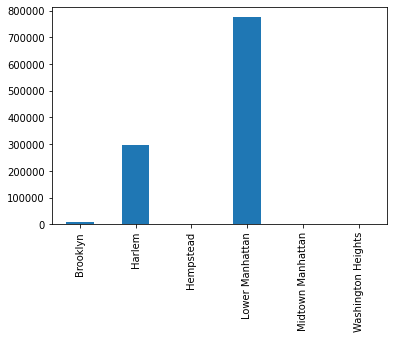

In [60]:
df['neighborhood'].value_counts().sort_index().plot(kind = 'bar')

In [6]:
df_test.columns

Index(['X', 'id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'day_of_month', 'month',
       'neighborhood', 'kmeanscluster', 'average_temperature', 'precipitation',
       'snowfall', 'snowdepth', 'distance_km', 'hour', 'cat_day'],
      dtype='object')

In [6]:
df = df.drop(['Unnamed: 0', 'X', 'speed_km_sec'], axis =1 )

In [7]:
df_test = df_test.drop(['X'], axis =1)

In [10]:
df_test.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'day_of_month', 'month',
       'neighborhood', 'kmeanscluster', 'average_temperature', 'precipitation',
       'snowfall', 'snowdepth', 'distance_km', 'hour', 'cat_day'],
      dtype='object')

In [8]:
#excluding pickup and dropoff date as that doesn't seem to be relevant, also excluding passenger count
dfu = df[['distance_km', 'average_temperature', 'precipitation', 'snowfall',
         'snowdepth', 'neighborhood', 'cat_day',  'trip_duration']]

In [9]:
dfu_test = df_test[['distance_km', 'average_temperature', 'precipitation', 'snowfall',
                  'snowdepth', 'neighborhood', 'cat_day']]

In [13]:
dfu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087451 entries, 0 to 1087450
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   distance_km          1087451 non-null  float64
 1   average_temperature  1087451 non-null  float64
 2   precipitation        1087451 non-null  float64
 3   snowfall             1087451 non-null  float64
 4   snowdepth            1087451 non-null  int64  
 5   neighborhood         1087451 non-null  object 
 6   cat_day              1087451 non-null  object 
 7   trip_duration        1087451 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 66.4+ MB


In [14]:
dfu.columns

Index(['distance_km', 'average_temperature', 'precipitation', 'snowfall',
       'snowdepth', 'neighborhood', 'cat_day', 'trip_duration'],
      dtype='object')

In [15]:
#engineer dummy variables for the categorical variables
#categorical features list
#
dfu_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   distance_km          625134 non-null  float64
 1   average_temperature  625134 non-null  float64
 2   precipitation        625134 non-null  float64
 3   snowfall             625134 non-null  float64
 4   snowdepth            625134 non-null  int64  
 5   neighborhood         625134 non-null  object 
 6   cat_day              625134 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.4+ MB


In [10]:
dfu = pd.get_dummies(dfu, columns=['neighborhood', 'cat_day'])
#dfu = dfu.drop(['hour', 'kmeanscluster', 'neighborhood'], axis=1)
#dfa = pd.concat([dfu, dfd], axis=1)

In [17]:
dfu.head()

,distance_km,average_temperature,precipitation,snowfall,snowdepth,trip_duration,neighborhood_Brooklyn,neighborhood_Harlem,neighborhood_Hempstead,neighborhood_Lower Manhattan,neighborhood_Midtown Manhattan,neighborhood_Washington Heights,cat_day_I,cat_day_II,cat_day_III
0,1.500199,45.5,0.29,0.0,0,455,0,0,0,1,0,0,0,1,0
1,1.807530,72.5,0.00,0.0,0,663,0,0,0,1,0,0,0,0,1
2,1.487163,39.0,0.00,0.0,0,429,0,0,0,1,0,0,0,1,0
3,1.189920,46.5,0.00,0.0,0,435,0,1,0,0,0,0,0,1,0
4,1.100174,33.5,0.00,0.0,6,443,0,0,0,1,0,0,0,0,1


In [12]:
dfd = dfu

In [13]:
#hot fix for snowfall, precipitation, snowdepth
#we assumed that trace precipitation, snowdepth and snowfall was equivalent to 0
#dfd.loc[df['precipitation'] == 'T'] = 0.00
#dfd.loc[df['snowfall'] == 'T'] = 0.00
#dfd.loc[df['snowdepth'] == 'T'] = 0.00

In [14]:
dfd['precipitation'].unique()

array([0.16, 0.47, 0.  , 0.05, 0.02, 1.65, 0.06, 0.04, 0.01, 0.12, 1.8 ,
       0.18, 0.09, 0.03, 0.24, 1.01, 0.45, 0.25, 0.22, 0.73, 0.14, 0.54,
       0.61, 0.11, 0.44, 0.53, 0.07, 0.3 , 1.22, 0.2 , 0.38, 0.91, 0.4 ,
       0.29, 2.31])

In [15]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543726 entries, 128037 to 534809
Data columns (total 15 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   distance_km                      543726 non-null  float64
 1   average_temperature              543726 non-null  float64
 2   precipitation                    543726 non-null  float64
 3   snowfall                         543726 non-null  float64
 4   snowdepth                        543726 non-null  int64  
 5   trip_duration                    543726 non-null  int64  
 6   neighborhood_Brooklyn            543726 non-null  uint8  
 7   neighborhood_Harlem              543726 non-null  uint8  
 8   neighborhood_Hempstead           543726 non-null  uint8  
 9   neighborhood_Lower Manhattan     543726 non-null  uint8  
 10  neighborhood_Midtown Manhattan   543726 non-null  uint8  
 11  neighborhood_Washington Heights  543726 non-null  uint8  
 1

In [13]:
dfd[['precipitation', 'snowfall', 'snowdepth']] = dfd[['precipitation', 'snowfall', 'snowdepth']].apply(pd.to_numeric)

In [17]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543726 entries, 128037 to 534809
Data columns (total 15 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   distance_km                      543726 non-null  float64
 1   average_temperature              543726 non-null  float64
 2   precipitation                    543726 non-null  float64
 3   snowfall                         543726 non-null  float64
 4   snowdepth                        543726 non-null  int64  
 5   trip_duration                    543726 non-null  int64  
 6   neighborhood_Brooklyn            543726 non-null  uint8  
 7   neighborhood_Harlem              543726 non-null  uint8  
 8   neighborhood_Hempstead           543726 non-null  uint8  
 9   neighborhood_Lower Manhattan     543726 non-null  uint8  
 10  neighborhood_Midtown Manhattan   543726 non-null  uint8  
 11  neighborhood_Washington Heights  543726 non-null  uint8  
 1

In [18]:
#dfa['snowfall'].info()

In [19]:
#now that we have converted all of the categorical columns to dummy variables, we can move on with modeling

In [20]:
#load the test data


In [21]:
#df_test = pd.read_csv('data/test.csv')

In [57]:
#need to engineer the same exact steps for the test data ??
#df_test.head()

## Modeling - Random Forest excluding neighborhoods

In [29]:
dfd.columns

Index(['distance_km', 'average_temperature', 'precipitation', 'snowfall',
       'snowdepth', 'trip_duration', 'neighborhood_Brooklyn',
       'neighborhood_Harlem', 'neighborhood_Hempstead',
       'neighborhood_Lower Manhattan', 'neighborhood_Midtown Manhattan',
       'neighborhood_Washington Heights', 'cat_day_I', 'cat_day_II',
       'cat_day_III'],
      dtype='object')

In [30]:
#dfd_nnn = dfd[['distance_km', 'average_temperature', 'precipitation', 'snowfall', 'snowdepth', 'trip_duration']]

In [14]:
# Scaling 

#dfd_nn = dfd.drop(['neighborhood_Brooklyn', 'neighborhood_Harlem', 'neighborhood_Hempstead', 'neighborhood_Lower Manhattan',
#                  'neighborhood_Midtown Manhattan', 'neighborhood_Washington Heights'], axis =1 )

from sklearn.model_selection import train_test_split

#Split into x and y 
X = np.array(dfu.drop(['trip_duration'], axis =1))
y = np.array(dfu[['trip_duration']])

#X_test = np.array(dfu_test.)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 123)

In [26]:
print(y_train.shape)
print(y_test.shape)

(815588, 1)
(271863, 1)


In [27]:
dfd.head()

,distance_km,average_temperature,precipitation,snowfall,snowdepth,trip_duration,neighborhood_Brooklyn,neighborhood_Harlem,neighborhood_Hempstead,neighborhood_Lower Manhattan,neighborhood_Midtown Manhattan,neighborhood_Washington Heights,cat_day_I,cat_day_II,cat_day_III
0,1.500199,45.5,0.29,0.0,0,455,0,0,0,1,0,0,0,1,0
1,1.807530,72.5,0.00,0.0,0,663,0,0,0,1,0,0,0,0,1
2,1.487163,39.0,0.00,0.0,0,429,0,0,0,1,0,0,0,1,0
3,1.189920,46.5,0.00,0.0,0,435,0,1,0,0,0,0,0,1,0
4,1.100174,33.5,0.00,0.0,6,443,0,0,0,1,0,0,0,0,1


In [28]:
corr = X.corr()

corr.style.background_gradient(cmap='coolwarm')

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

In [ ]:
#matrix = np.corrcoef(X)
#matrix

In [50]:
corr = dfd_nnn.corr()

corr.style.background_gradient(cmap='coolwarm')

,distance_km,average_temperature,precipitation,snowfall,snowdepth,trip_duration
distance_km,1.000000,0.377886,0.067231,0.011214,0.019520,0.714446
average_temperature,0.377886,1.000000,0.120551,-0.041233,-0.045450,0.520726
precipitation,0.067231,0.120551,1.000000,0.337620,-0.005369,0.078703
snowfall,0.011214,-0.041233,0.337620,1.000000,0.116930,0.016854
snowdepth,0.019520,-0.045450,-0.005369,0.116930,1.000000,0.052453
trip_duration,0.714446,0.520726,0.078703,0.016854,0.052453,1.000000


In [15]:
from sklearn.ensemble import RandomForestRegressor
#rf = RandomForestRegressor(max_depth = 3 , n_estimators = 3 , random_state = 42)
rf = RandomForestRegressor()

#rf.fit(X_train_scaled, y_train)

In [30]:
X_train.shape

(815588, 14)

In [31]:
X_test.shape

(271863, 14)

In [16]:
rf.fit(X_train, y_train)
#y_pred = model.predict(X_test_scaled)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [76]:
from sklearn.metrics import r2_score

In [1]:
predictions = rf.predict(X_test)

errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))
print('Mean Squared Error: ', round(np.mean(np.sqrt(errors))))
print('Mean Squared Error: ', round(np.mean(errors**2)))
print('R squared: ', round(r2_score(predictions, y_test),2))

In [20]:
output_df = pd.DataFrame()


output_df['y_test'] = y_test
output_df['predictions'] = predictions

output_df['Mean Absolute Error: '] = round(np.mean(errors), 2)
output_df['Mean Squared Error: '] = round(np.mean(errors**2), 2)
output_df['R squared: '] = round(r2_score(predictions, y_test), 2)


In [21]:
output_df.head()

,predictions,Mean Absolute Error:,Mean Squared Error:,R squared:
0,609.7,269.82,109592.69,0.18
1,449.9,269.82,109592.69,0.18
2,490.4,269.82,109592.69,0.18
3,846.1,269.82,109592.69,0.18
4,509.6,269.82,109592.69,0.18


In [19]:
feature_list = list(dfu.columns)

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:10} Importance: {}'.format(*pair)) for pair in feature_importances];

# Modeling - Random Forest excluding neighborhoods

In [2]:
#getting rid of neighborhoods
dfu = dfu.drop(['neighborhood_Harlem', 'neighborhood_Brooklyn', 'neighborhood_Hempstead', 'neighborhood_Lower Manhattan',
               'neighborhood_Midtown Manhattan', 'neighborhood_Washington Heights'], axis =1)

In [91]:
from sklearn.model_selection import train_test_split

#Split into x and y 
X = np.array(dfu.drop(['trip_duration'], axis =1))
y = np.array(dfu[['trip_duration']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 123)

## Modeling

We wanted to continue investigating feature selection methods

In [92]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 30, max_depth = 8, random_state = 42)

rf.fit(X_train, y_train)

/var/folders/v0/2szl9lcj3rg4kjvn96t45wrm0000gn/T/ipykernel_9476/2665894178.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=8, n_estimators=30, random_state=42)

In [93]:
model = rf.fit(X_train, y_train)
y_pred = model.predict(X_test)

/var/folders/v0/2szl9lcj3rg4kjvn96t45wrm0000gn/T/ipykernel_9476/2926072320.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = rf.fit(X_train, y_train)


In [ ]:
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))
print('Mean Squared Error: ', round(np.mean(np.sqrt(errors)), 2))
print('R squared: ', round(r2_score(y_pred, y_test), 2))

In [ ]:
feature_list = list(dfu.columns)

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:10} Importance: {}'.format(*pair)) for pair in feature_importances];

## Cross-validation kfold


In [82]:
param_grid = {
    'max_depth': [2,4,8], 'n_estimators': [10, 20, 30]
}

In [83]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

In [76]:
grid_search.fit(X_train_scaled, y_train)
grid_search.best_params_

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   19.4s finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'max_depth': 8, 'n_estimators': 30}

When utilizing grid search, we find that the best parameters for the performance of the random forest model out of the provided options are 8 depth of the tree and 30 trees. We can now re-fit the model with these parameters.